In [1]:
# importing necessary libraries for EDA and Cleaning
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')

In [8]:
path = pd.read_csv(r'C:\Users\ADMIN\Desktop\Tweets.csv')
path.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:

path.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [10]:
#Check for missing values
100*path.isna().sum()/len(path)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [11]:
path['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [12]:

path['airline_sentiment'].value_counts(normalize = True)

airline_sentiment
negative    0.626913
neutral     0.211680
positive    0.161407
Name: proportion, dtype: float64

In [13]:
path['airline'].value_counts()


airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

In [14]:
path['airline'].value_counts()


airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

In [15]:
path['negativereason'].value_counts()

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

In [16]:
path['negativereason_gold'].value_counts()

negativereason_gold
Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nFlight Attendant Complaints     1
Late Flight\nLost Luggage                    1
Bad Flight                                   1
Lost Luggage\nDamaged Luggage                1
Late Flight\nCancelled Flight                1
Flight Attendant Complaints                  1
Customer Service Issue\nLost Luggage         1
Customer Service Issue\nCan't Tell           1
Name: count, dtype: int64

In [17]:

path['airline_sentiment_gold'].value_counts()

airline_sentiment_gold
negative    32
positive     5
neutral      3
Name: count, dtype: int64

In [18]:
path['retweet_count'].value_counts()

retweet_count
0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: count, dtype: int64

In [19]:
path['tweet_coord'].value_counts()

tweet_coord
[0.0, 0.0]                      164
[40.64656067, -73.78334045]       6
[32.91792297, -97.00367737]       3
[40.64646912, -73.79133606]       3
[35.22643463, -80.93879965]       2
                               ... 
[40.69429232, -74.17208436]       1
[37.61833841, -122.38389799]      1
[37.61859126, -122.38385699]      1
[45.58931882, -122.5959928]       1
[40.64946781, -73.76624703]       1
Name: count, Length: 832, dtype: int64

In [20]:
path['airline_sentiment_gold'].value_counts()

airline_sentiment_gold
negative    32
positive     5
neutral      3
Name: count, dtype: int64

In [21]:
path['retweet_count'].value_counts()

retweet_count
0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: count, dtype: int64

In [22]:
path['tweet_coord'].value_counts()

tweet_coord
[0.0, 0.0]                      164
[40.64656067, -73.78334045]       6
[32.91792297, -97.00367737]       3
[40.64646912, -73.79133606]       3
[35.22643463, -80.93879965]       2
                               ... 
[40.69429232, -74.17208436]       1
[37.61833841, -122.38389799]      1
[37.61859126, -122.38385699]      1
[45.58931882, -122.5959928]       1
[40.64946781, -73.76624703]       1
Name: count, Length: 832, dtype: int64

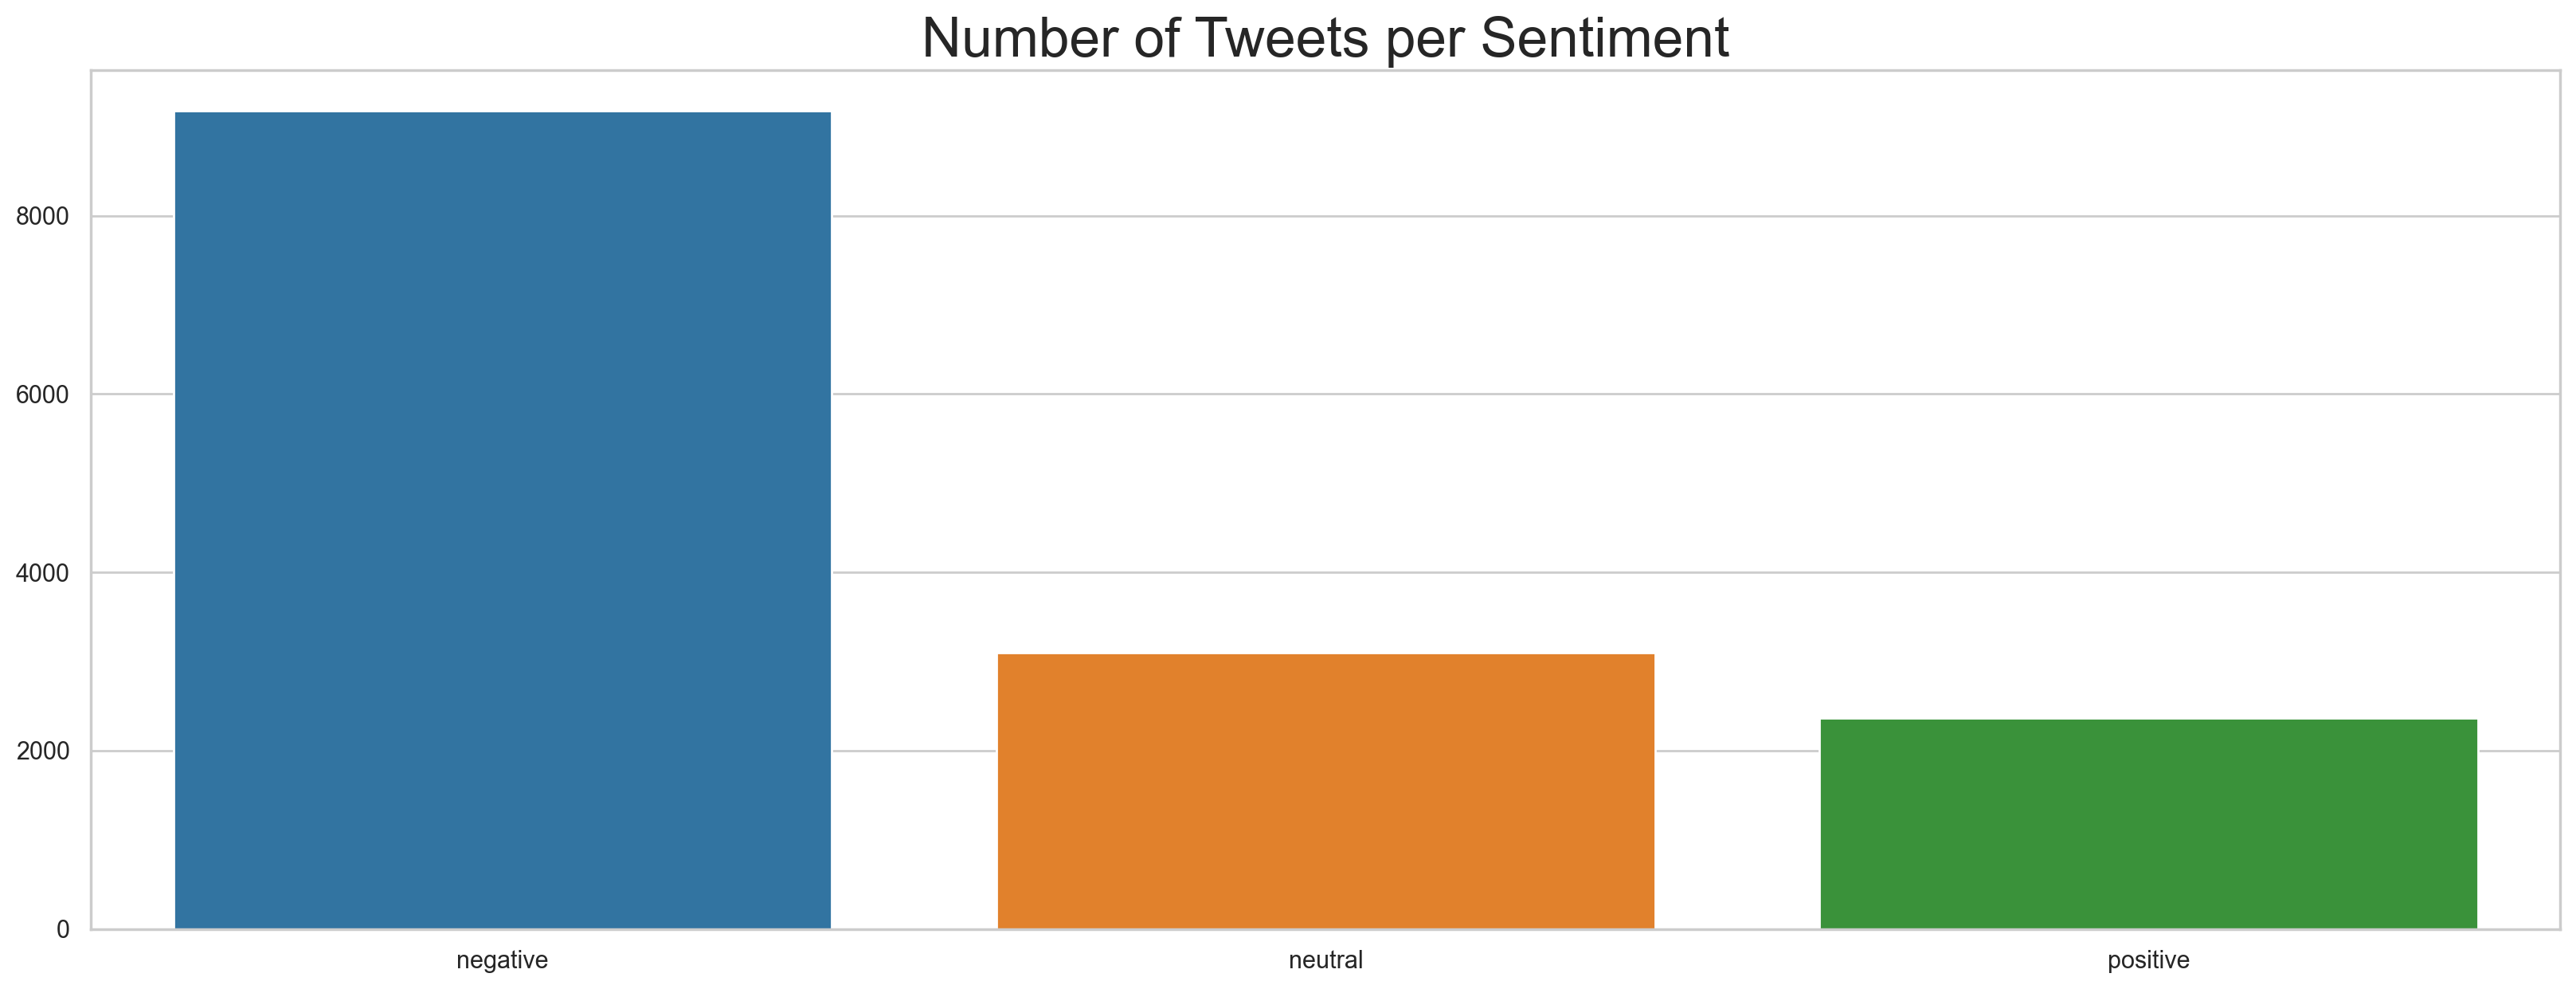

In [23]:

plt.figure(figsize=(20,7));
sns.countplot(x= path.airline_sentiment, order = path.airline_sentiment.value_counts().index);
plt.xlabel('');
plt.ylabel('');
plt.title('Number of Tweets per Sentiment',fontsize = 25);
plt.show()

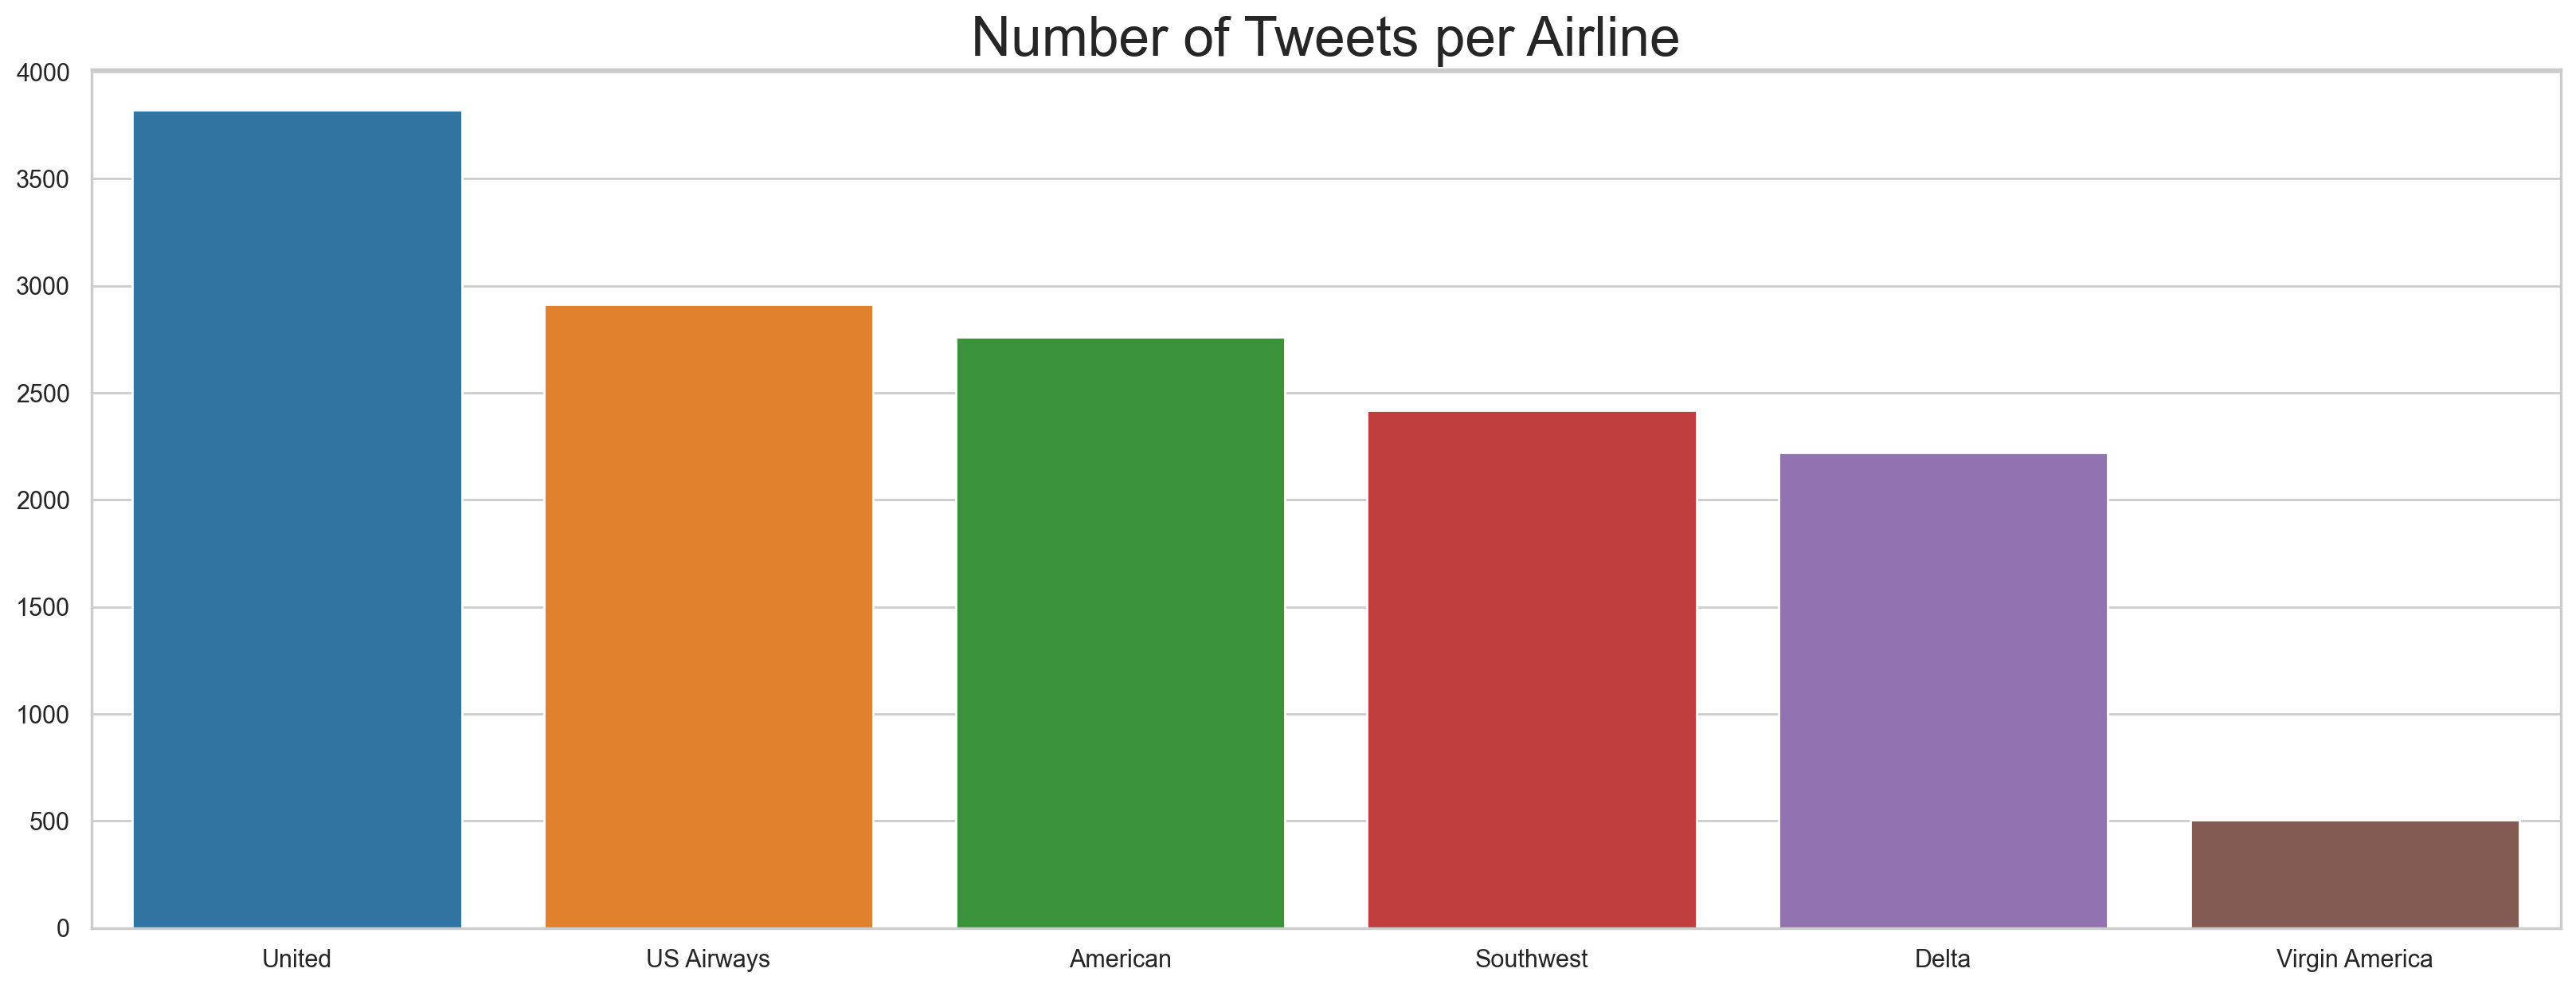

In [24]:
plt.figure(figsize=(20,7));
sns.countplot(x= path.airline, order = path.airline.value_counts().index);
plt.xlabel('');
plt.ylabel('');
plt.title('Number of Tweets per Airline',fontsize = 25);
plt.show()

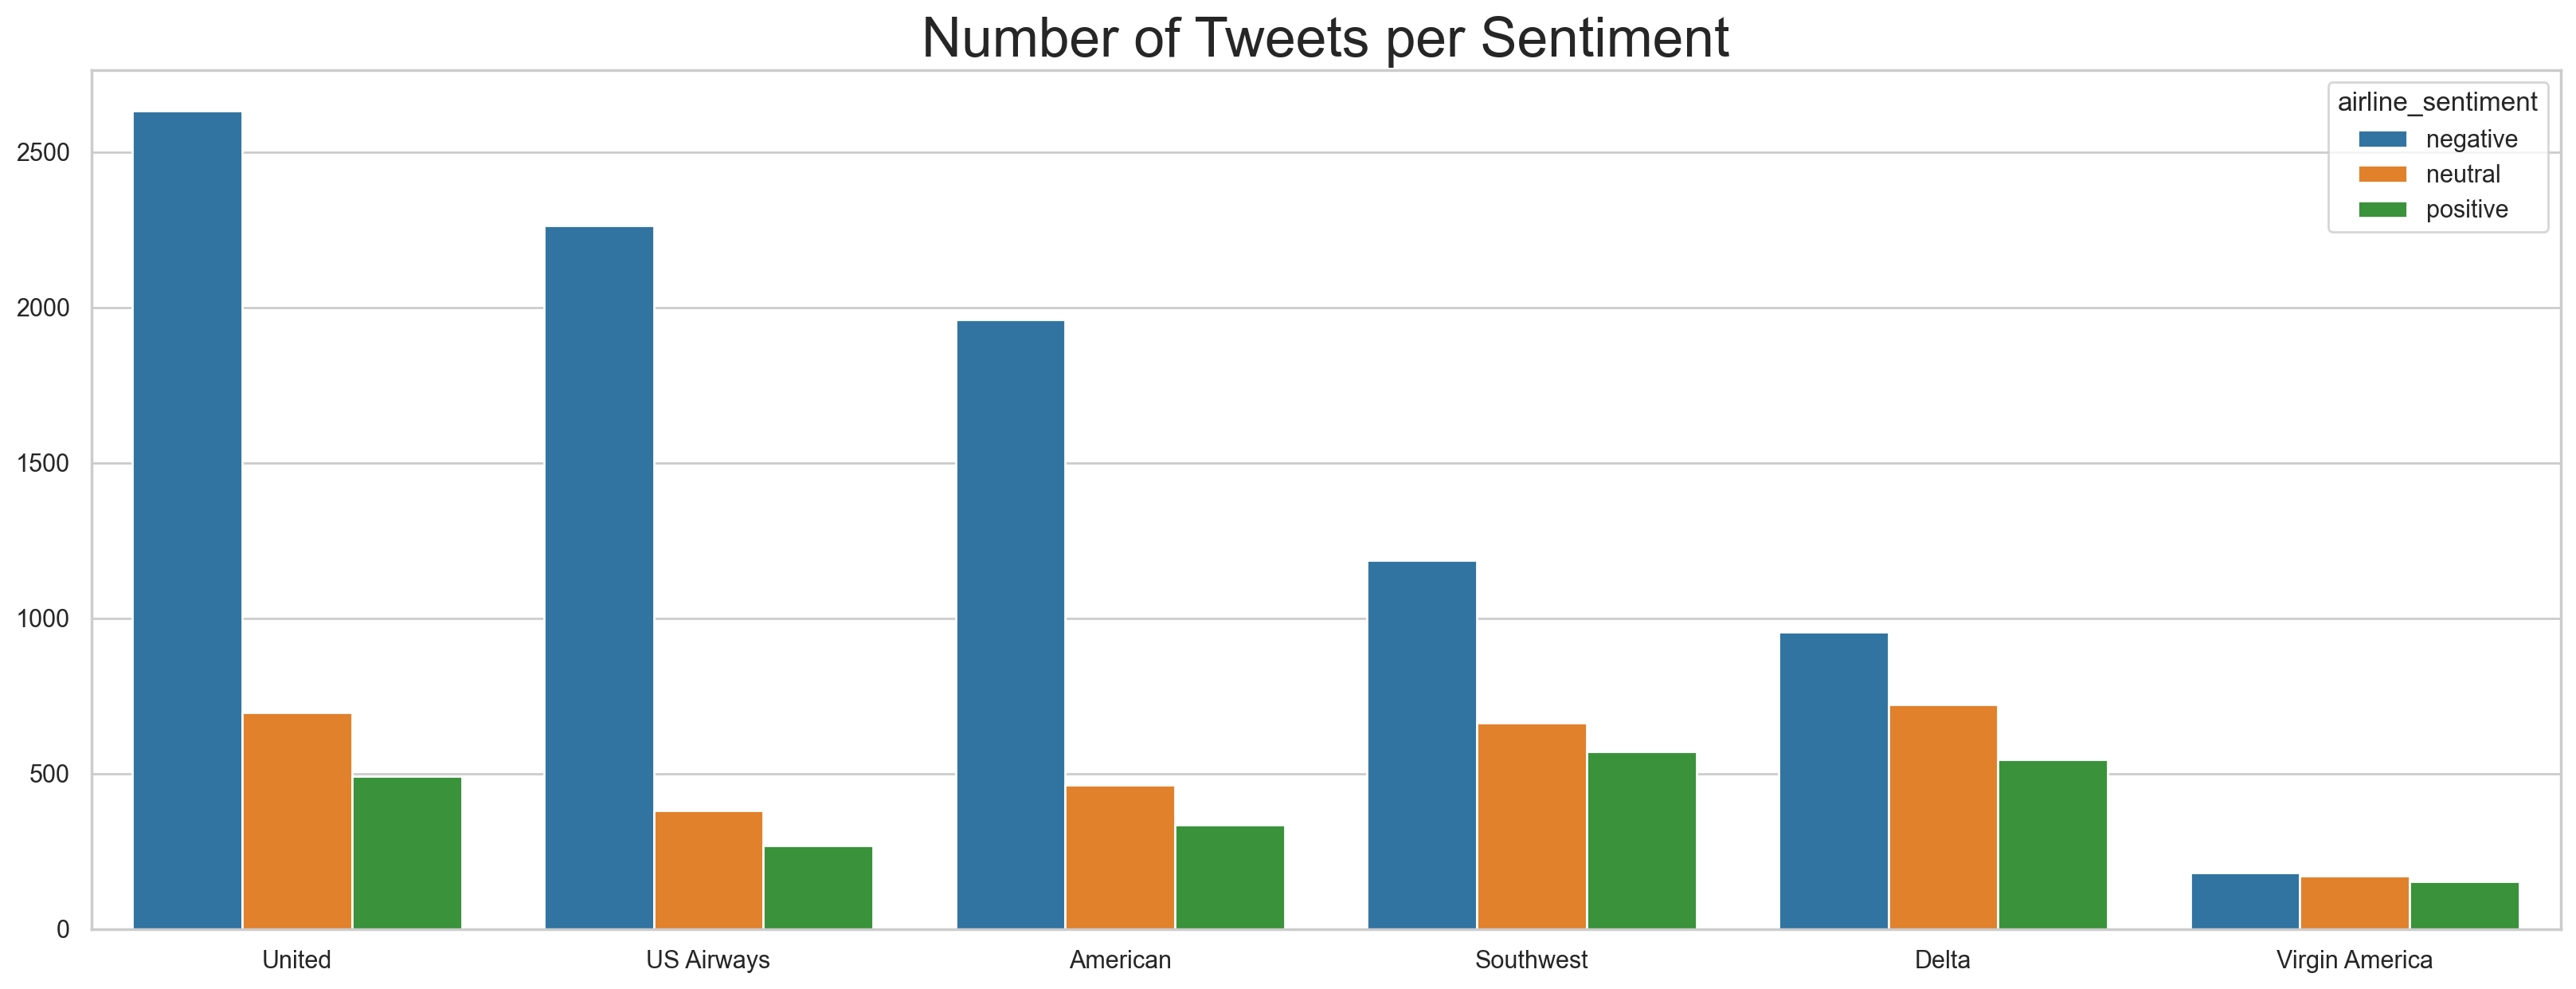

In [25]:

plt.figure(figsize=(20,7));
sns.countplot(x= path.airline , order = path.airline.value_counts().index ,hue= path.airline_sentiment ,
              hue_order = path.airline_sentiment.value_counts().index);
plt.xlabel('');
plt.ylabel('');
plt.title('Number of Tweets per Sentiment',fontsize = 25);
plt.show()

In [26]:
grouped_tweets =path.groupby(['airline','airline_sentiment']).count().iloc[:,0]
grouped_tweets

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: tweet_id, dtype: int64

In [27]:
total_tweets =path.groupby('airline')['airline_sentiment'].count()
total_tweets

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64

                Negative  Positive   Neutral
American        0.710402  0.121783  0.167814
Delta           0.429793  0.244824  0.325383
Southwest       0.490083  0.235537  0.274380
US Airways      0.776862  0.092345  0.130793
United          0.688906  0.128728  0.182365
Virgin America  0.359127  0.301587  0.339286


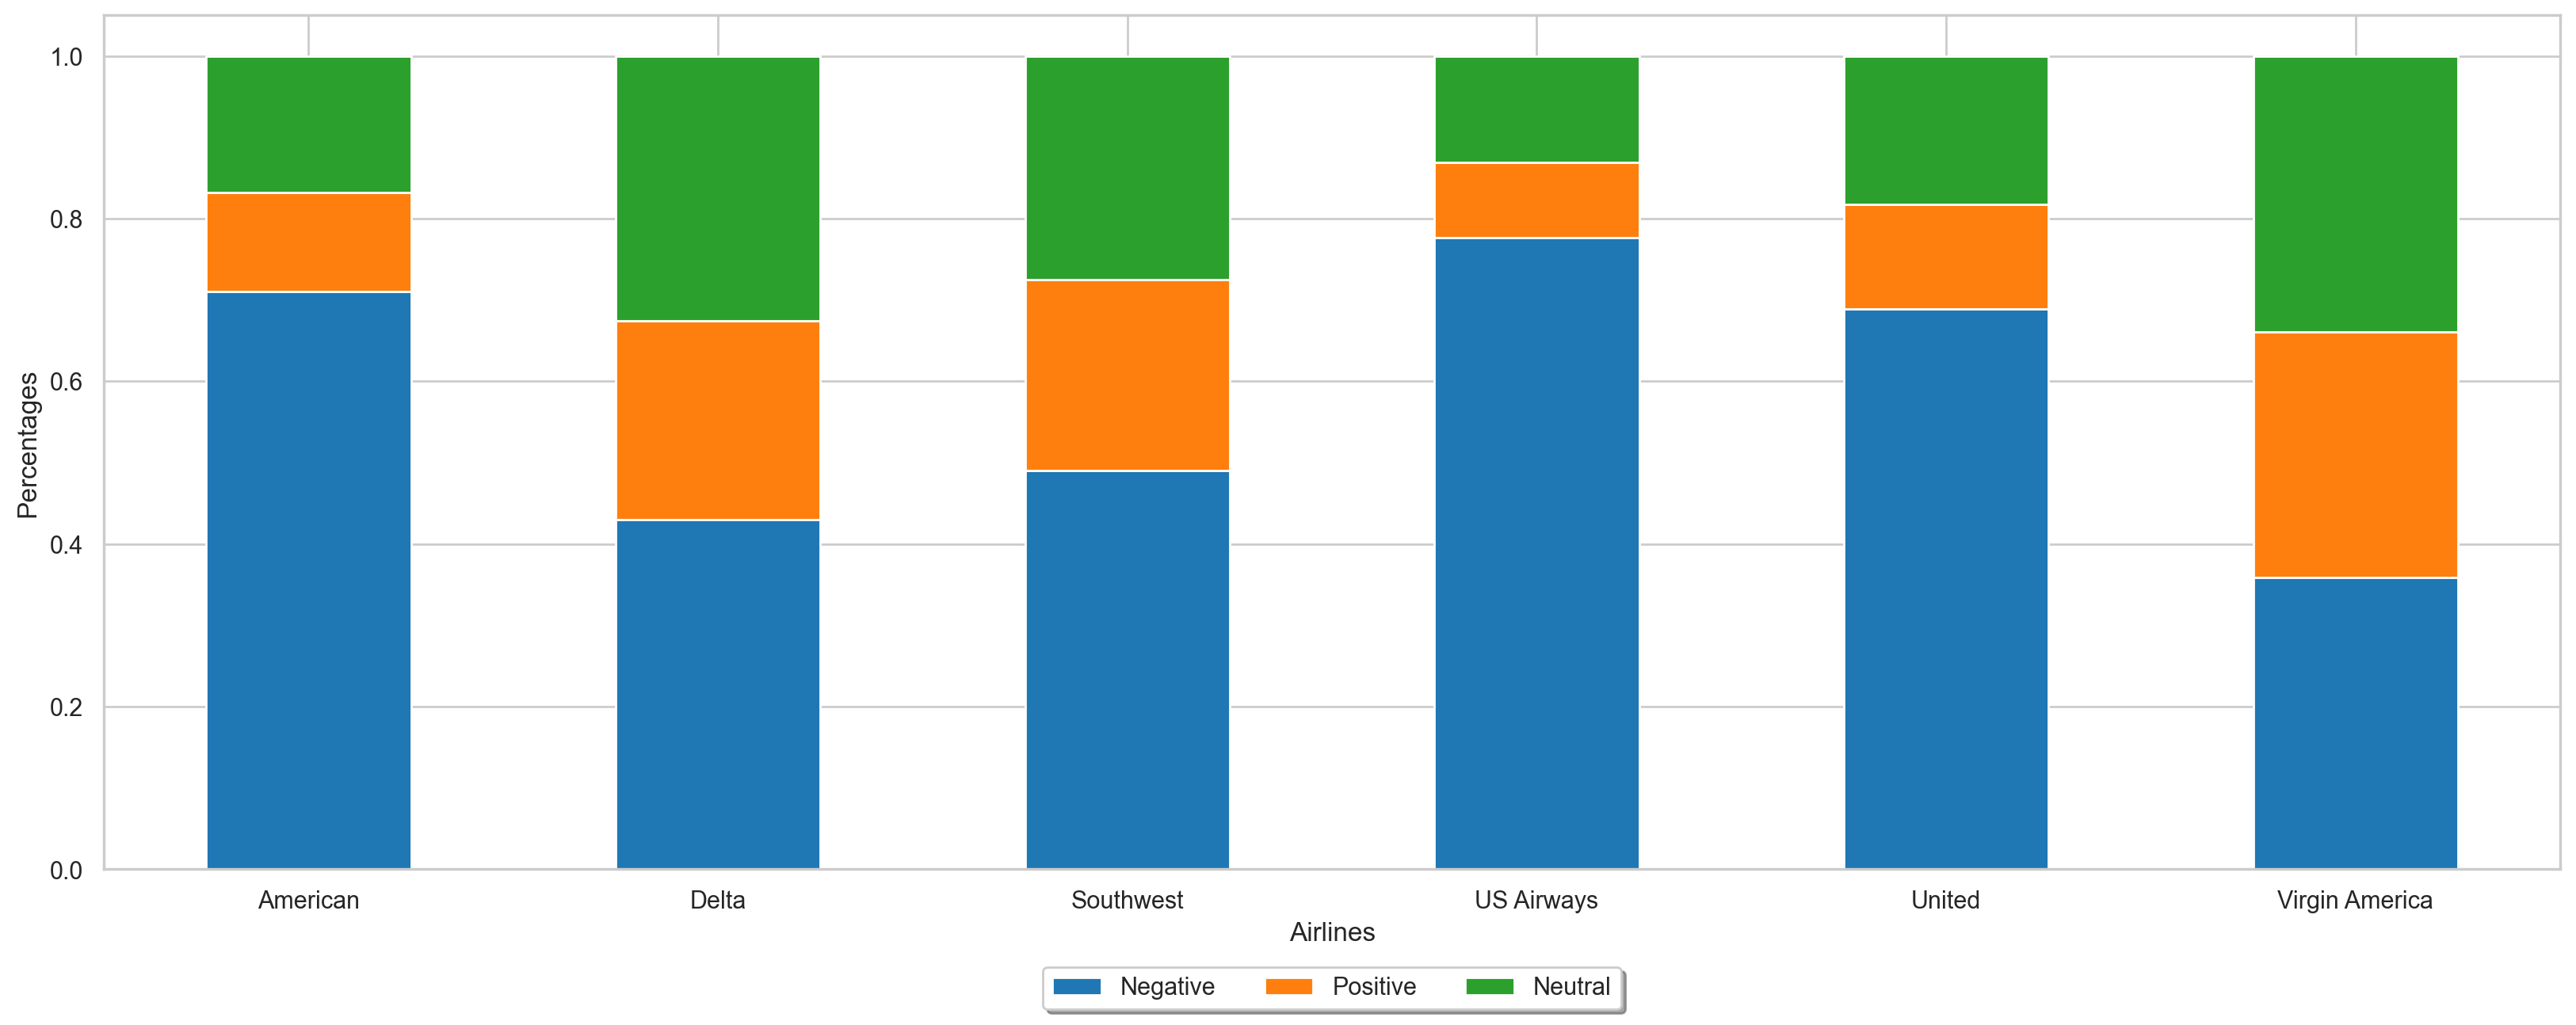

In [28]:
negative_perc = {'American':grouped_tweets[0] / total_tweets[0],
                 'Delta':grouped_tweets[3] / total_tweets[1],
                 'Southwest': grouped_tweets[6] / total_tweets[2],
                 'US Airways': grouped_tweets[9] / total_tweets[3],
                 'United': grouped_tweets[12] / total_tweets[4],
                 'Virgin America': grouped_tweets[15] / total_tweets[5]}

positive_perc = {'American':grouped_tweets[2] / total_tweets[0],
                 'Delta':grouped_tweets[5] / total_tweets[1],
                 'Southwest': grouped_tweets[8] / total_tweets[2],
                 'US Airways': grouped_tweets[11] / total_tweets[3],
                 'United': grouped_tweets[14] / total_tweets[4],
                 'Virgin America': grouped_tweets[17] / total_tweets[5]}
  
neutral_perc =  {'American':grouped_tweets[1] / total_tweets[0],
                 'Delta':grouped_tweets[4] / total_tweets[1],
                 'Southwest': grouped_tweets[7] / total_tweets[2],
                 'US Airways': grouped_tweets[10] / total_tweets[3],
                 'United': grouped_tweets[13] / total_tweets[4],
                 'Virgin America': grouped_tweets[16] / total_tweets[5]}
  

#make a dataframe from the dictionary
df_neg_perc = pd.DataFrame.from_dict(negative_perc, orient = 'index')
df_pos_perc = pd.DataFrame.from_dict(positive_perc, orient = 'index')
df_neu_perc = pd.DataFrame.from_dict(neutral_perc, orient = 'index')

#have to manually set column name when using .from_dict() method
df_neg_perc.columns = ['Negative']
df_pos_perc.columns = ['Positive']
df_neu_perc.columns = ['Neutral']

# Merge all percentage dataframes
# percentage = merge_dfs(df_neg_perc, df_pos_perc, df_neu_perc) 
df_list = [df_neg_perc, df_pos_perc, df_neu_perc]
percentage =pd.concat(df_list, axis = 1)
print(percentage)

#graph all of our data
ax = percentage.plot(kind = 'bar', stacked = True, rot = 0, figsize = (20,7))
#set x label
ax.set_xlabel('Airlines')
#set y label
ax.set_ylabel('Percentages')
#move the legend to the bottom of the graph since it wants to sit over all of our data and block it - stupid legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

plt.show()

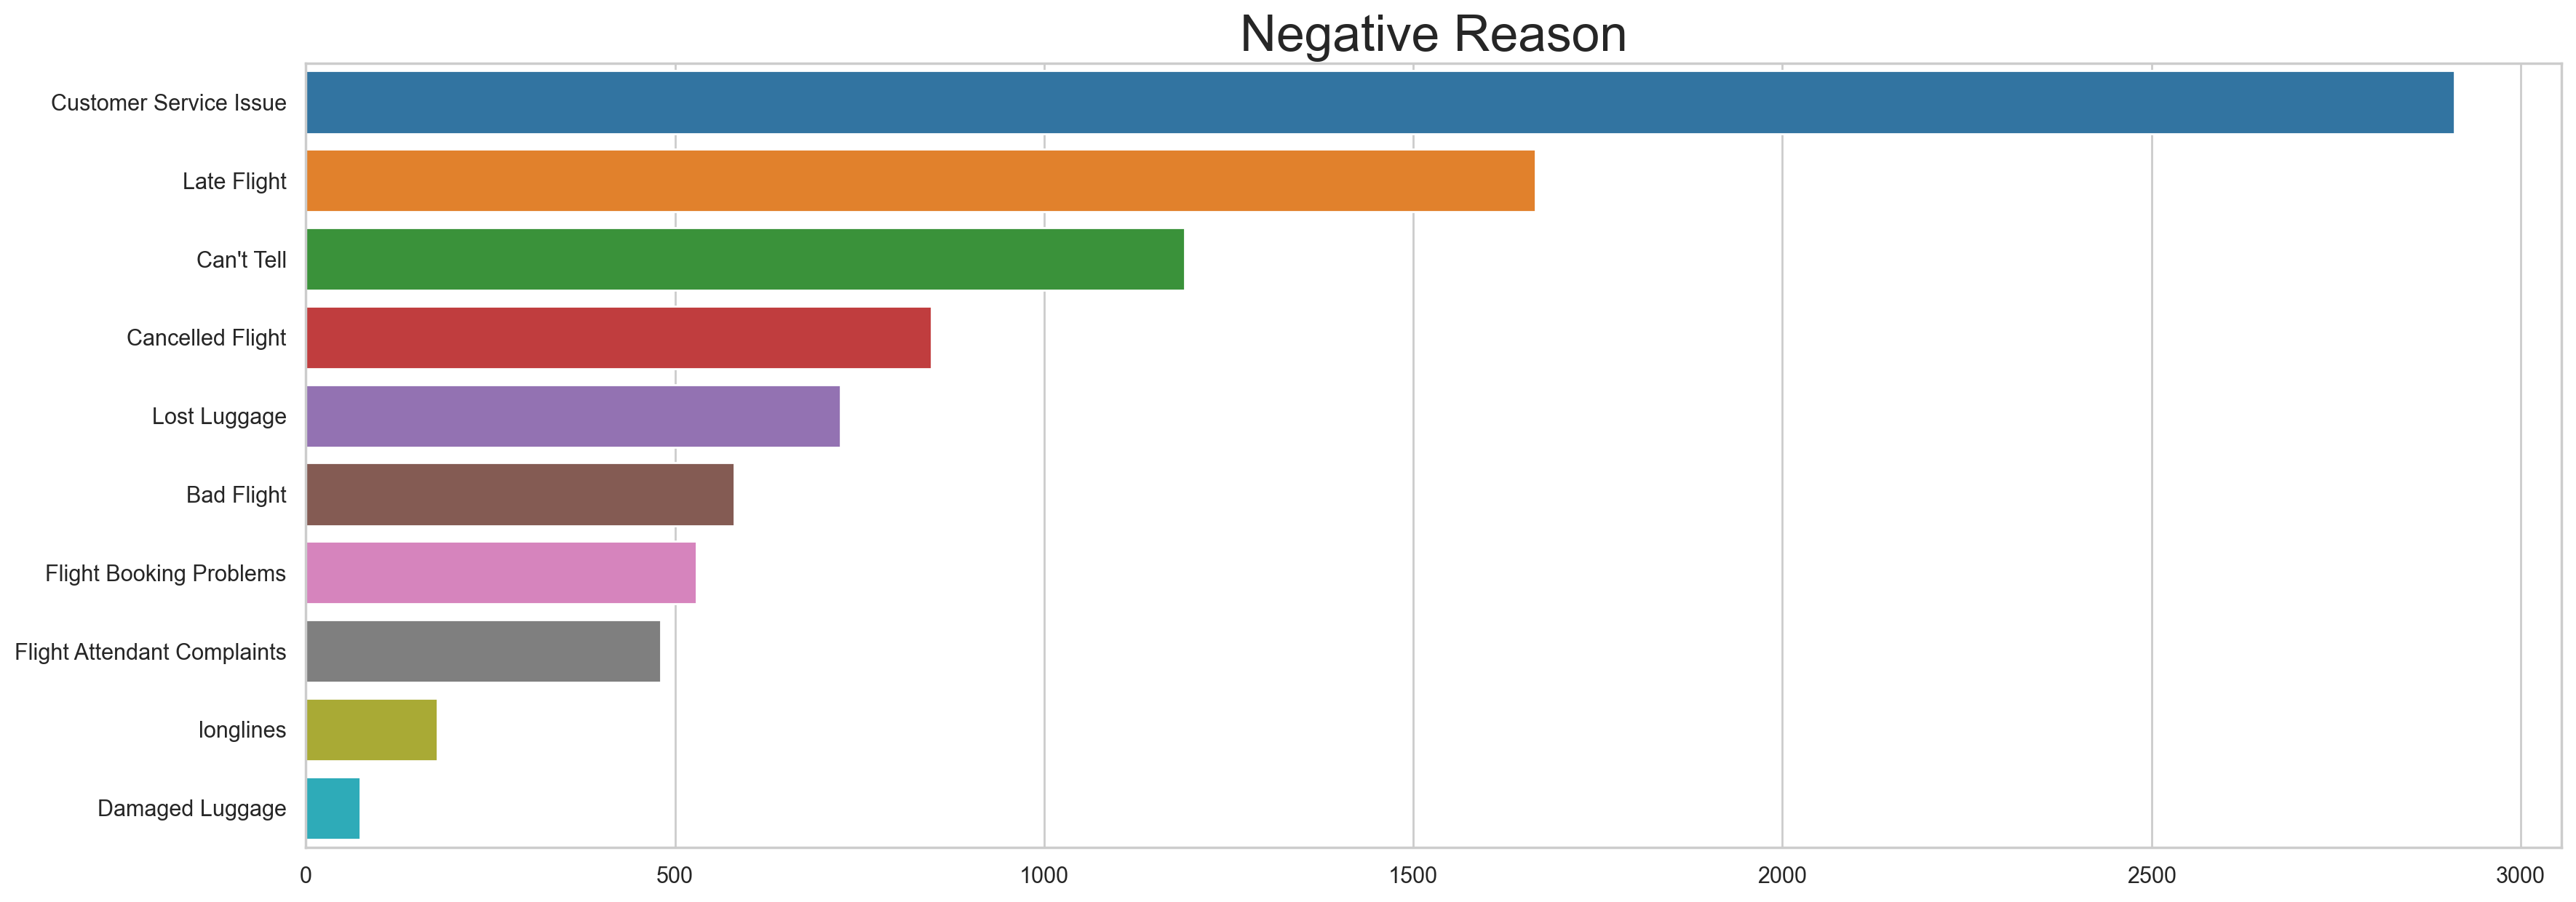

In [31]:
plt.figure(figsize=(20,7));
sns.countplot(y= path.negativereason , order = path.negativereason.value_counts().index);
plt.xlabel('');
plt.ylabel('');
plt.title('Negative Reason',fontsize = 25);
plt.show()

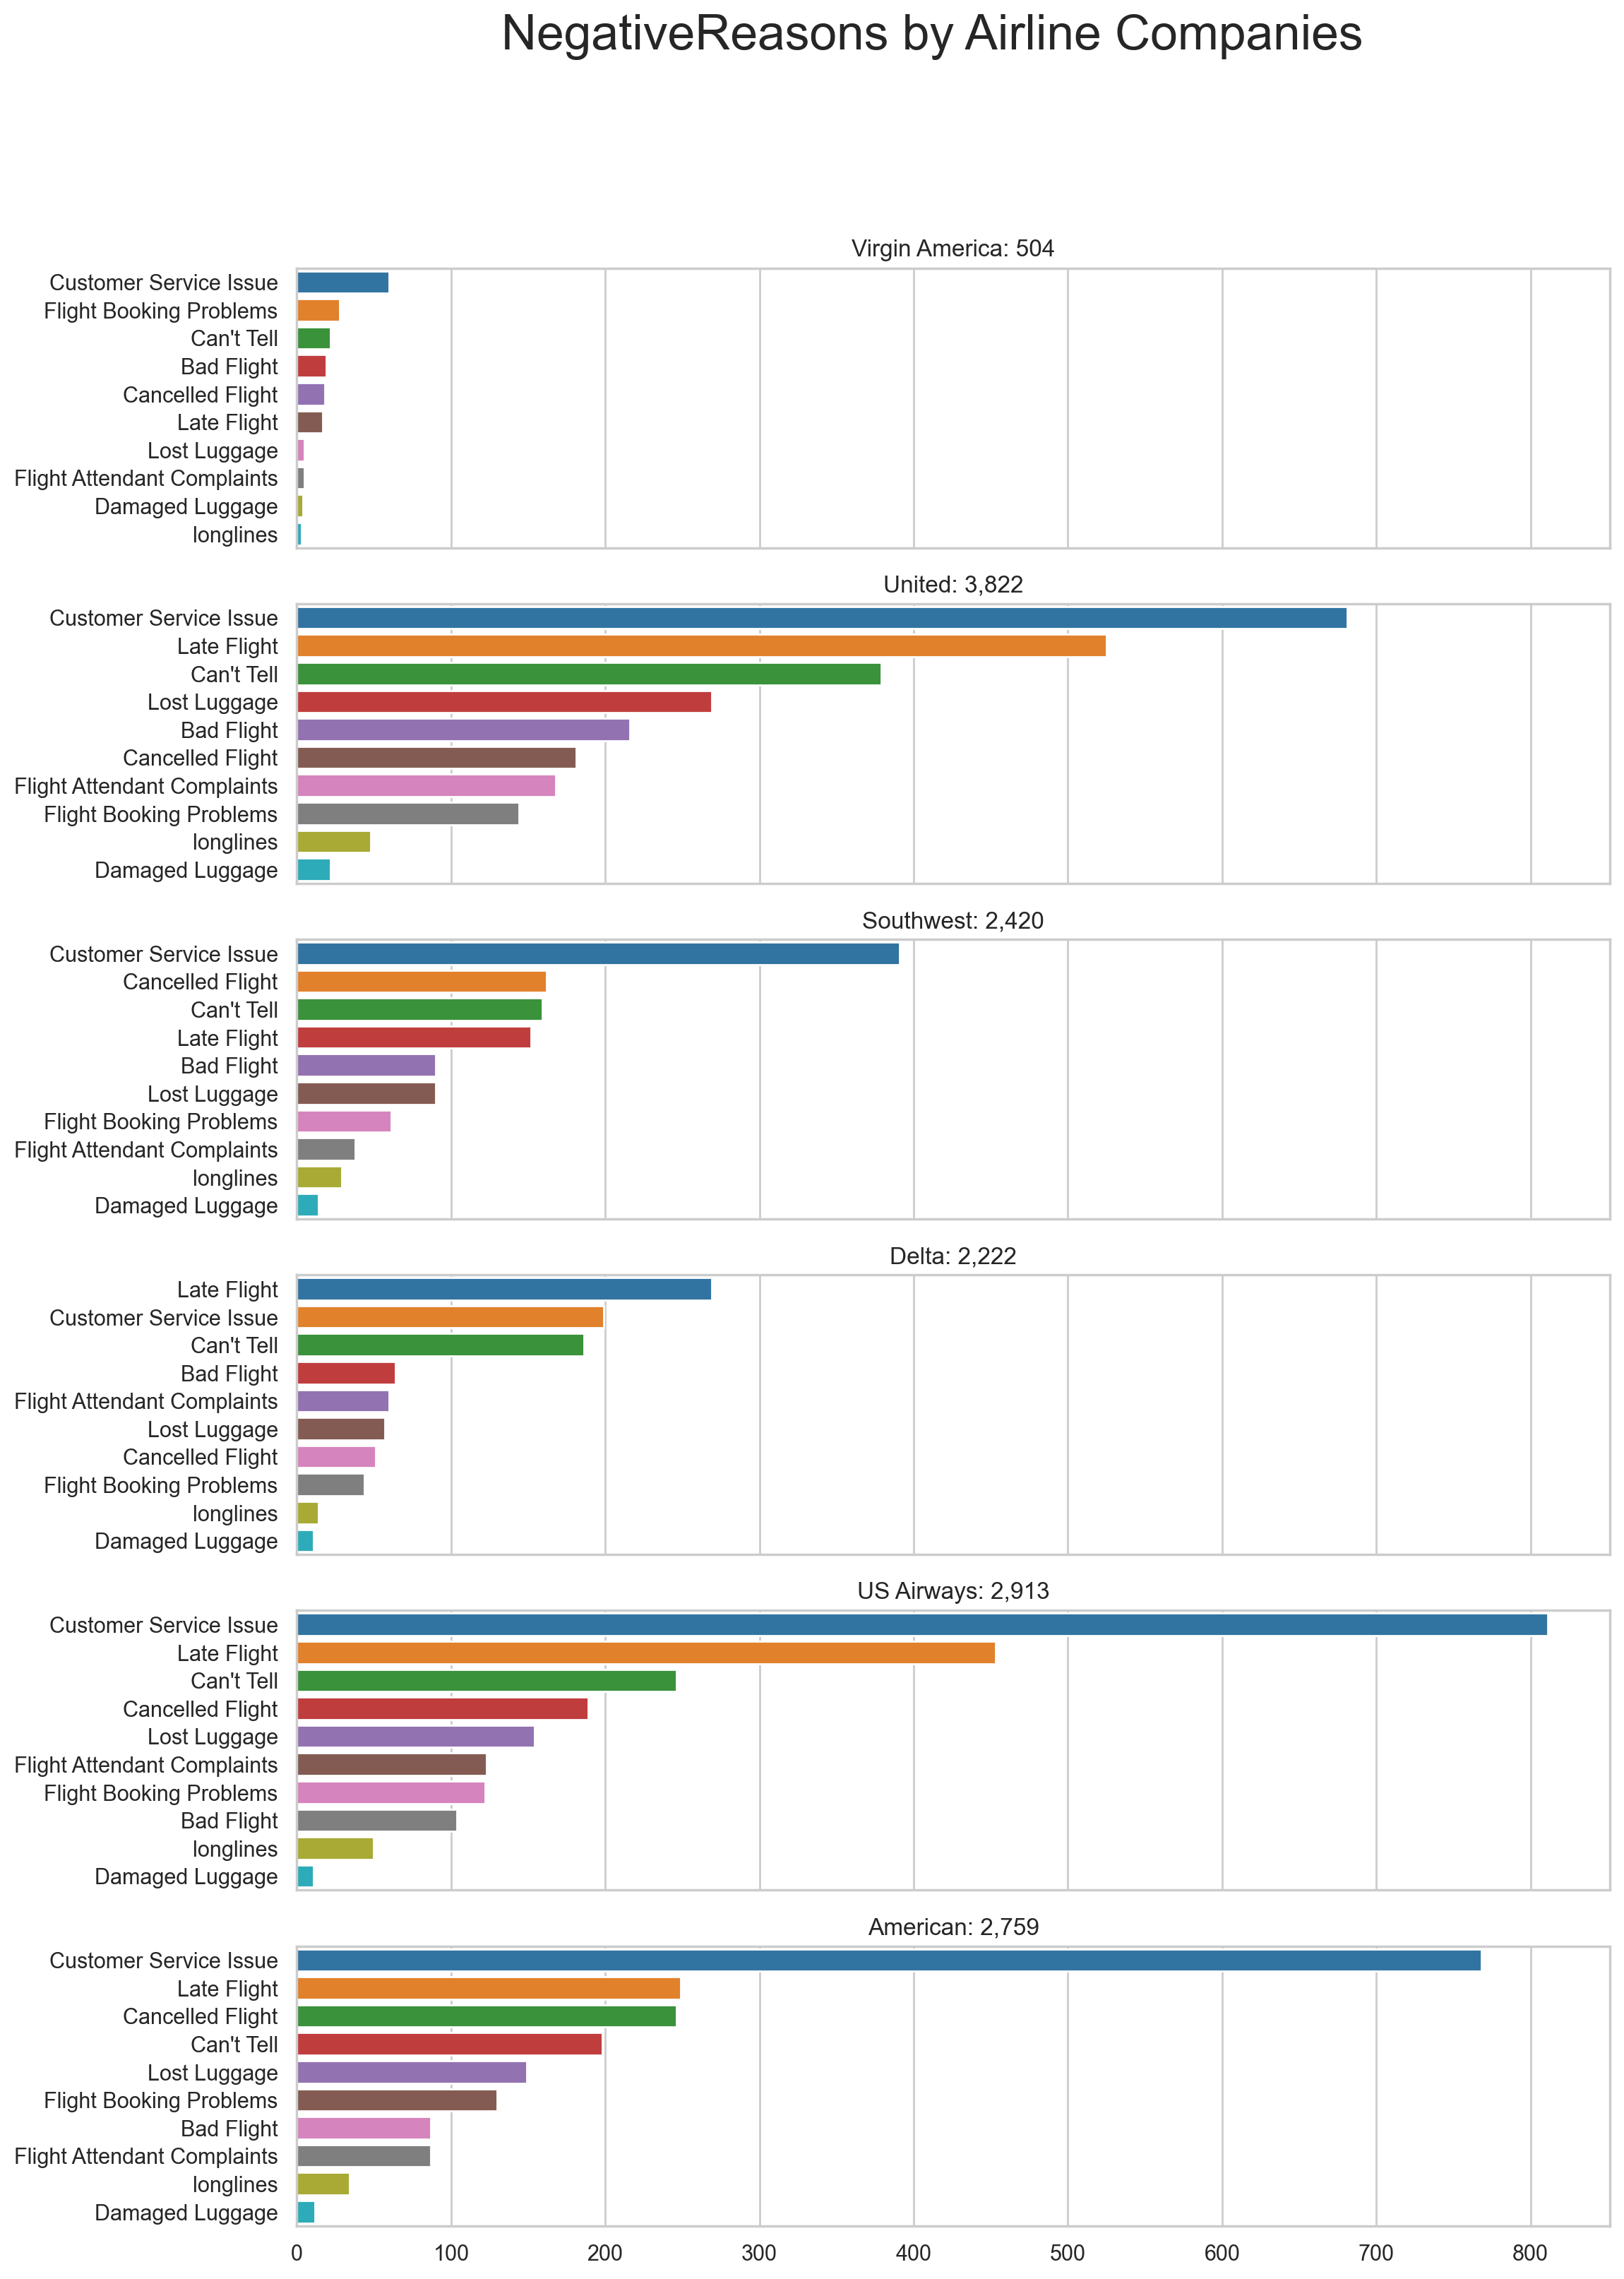

In [33]:

# Negative reasons per airline companies.
fig, axes = plt.subplots(6,1, figsize=(12,18), sharex=True)
axes = axes.flatten()
airlines = path['airline'].unique()

for airline, ax in zip(airlines, axes.flatten()):
    ax = sns.countplot(data = path[path.airline==airline], y = 'negativereason',
                       order = path[path.airline==airline].negativereason.value_counts().index,
                       hue_order =path.negativereason.value_counts().index,ax = ax
                       )
    ax.set_title(f"{airline}: {format(len(path[path.airline==airline]),',')}")
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle("NegativeReasons by Airline Companies", fontsize = 25)
plt.show()

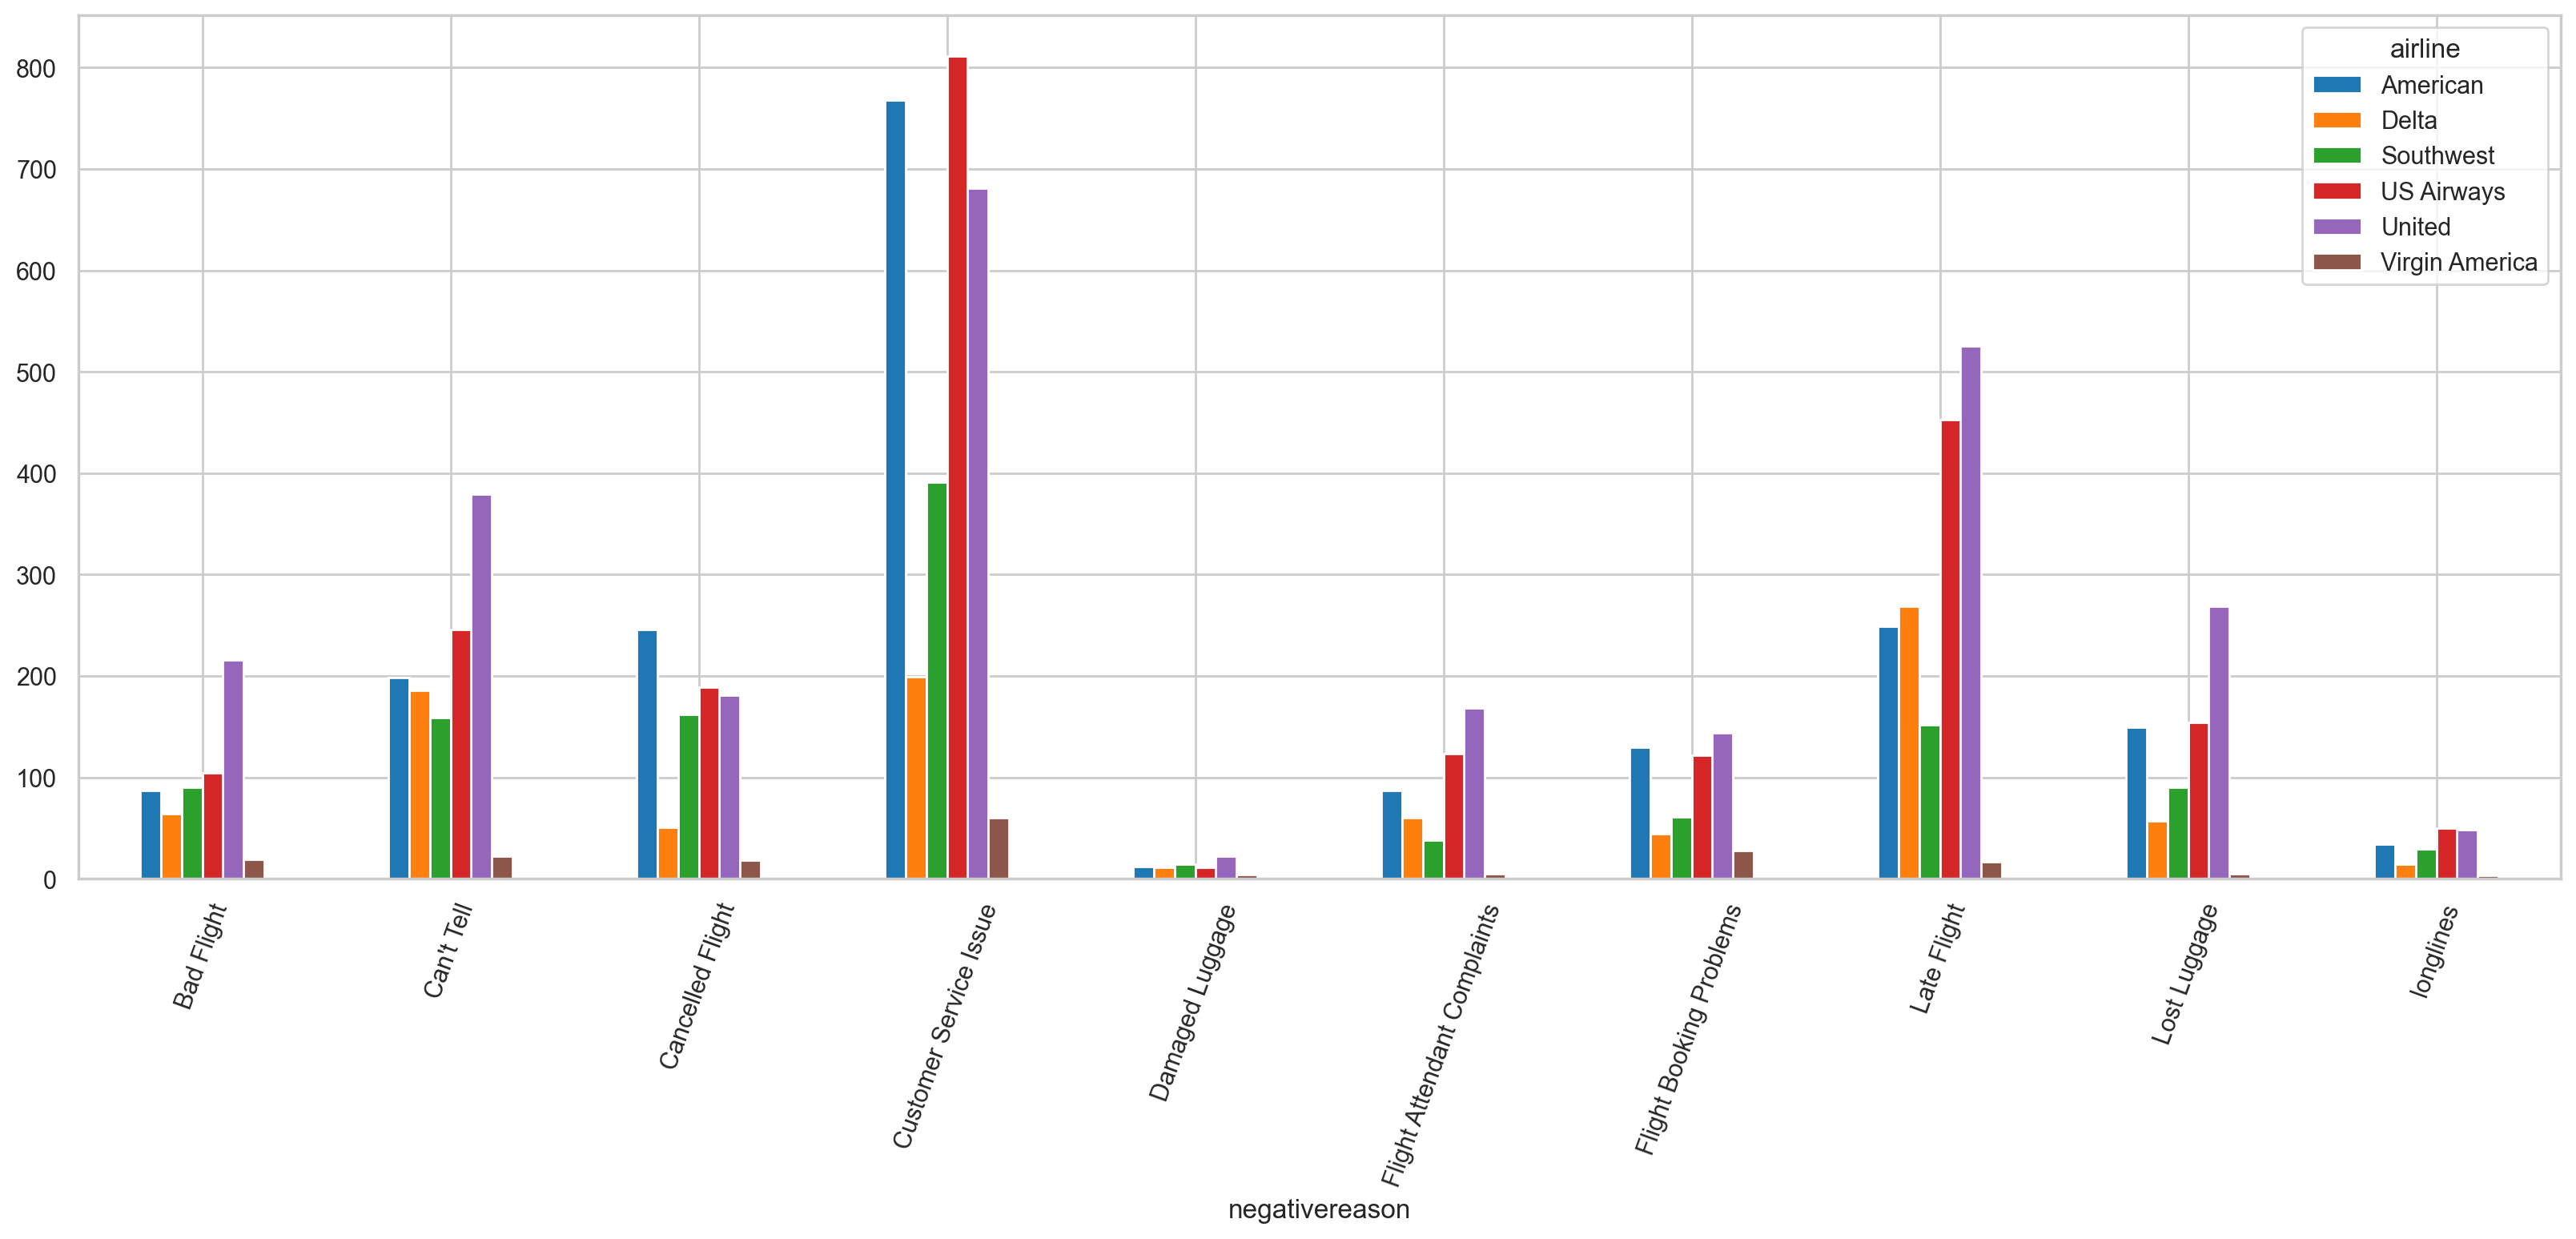

In [34]:
#function that reduces the dataframe to only the airline and the negative reasons, then extract the reasons and the frequency
#each reason was referenced to an airline
def reason(path):
    path = path.reset_index().loc[:,['airline','negativereason']].dropna().groupby(['airline','negativereason']).size()
    return path

#call the function and plot the results
ax = reason(path).unstack(0).plot(kind = 'bar', figsize = (20,7), rot = 70)

plt.show()